<a href="https://colab.research.google.com/github/zenilist/DataAnalytics/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pima Indian Diabetes**



This dataset was sourced from the UCI repository. It has 768 records, 8 attributes and one response variable. All patients were females at least 21 years of age of Pima Indian heritage.
The main focus of this dataset is to find the key variables and make a good prediction model to predict a patient's chance of getting diabetes.

##**Attribute Description**:



|                Attribute |                                                     Attribute Description |   |   |   |   |   |   |
|-------------------------:|--------------------------------------------------------------------------:|--:|--:|--:|--:|--:|--:|
| Pregnancies              | Number of times pregnant                                                  |   |   |   |   |   |   |
| Glucose                  | Plasma glucose concentration at 2 hours in an oral glucose tolerance test |   |   |   |   |   |   |
| BloodPressure            | Diastolic blood pressure in mmHg                                          |   |   |   |   |   |   |
| SkinThickness            | Triceps skin fold thickness in mm                                         |   |   |   |   |   |   |
| Insulin                  | 2 hour serum insulin in mu U/ml                                           |   |   |   |   |   |   |
| BMI                      | Body mass index (weight in kg/(height in m)^2)                            |   |   |   |   |   |   |
| DiabetesPedigreeFunction | Diabetes pedigree function                                                |   |   |   |   |   |   |
| Age                      | Age of the patient                                                        |   |   |   |   |   |   |
                    

##*Analysis of some attributes*

* **Pregnancies**: All pregnant women have some insulin resistance during late pregnancy. Most pregnant women can produce enough insulin to overcome insulin resistance, but some cannot. These women develop gestational diabetes. Pregnant women who can't make enough insulin during late pregnancy develop gestational diabetes. Those who develop gestational diabetes are at higher risk of developing type 2 diabetes later in life. [source](https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/gestational/symptoms-causes#:~:text=All%20pregnant%20women%20have%20some,late%20pregnancy%20develop%20gestational%20diabetes.)
* **Glucose**: Two hours after drinking the oral glucose tolerance solution, a normal blood glucose level is lower than 155 mg/dL (8.6 mmol/L). [source](https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296#:~:text=A%20normal%20fasting%20blood%20glucose,(8.6%20mmol%2FL).)
* **Blood Pressure**: Diastolic - Normal levels: under 90 mmHg
* **Skin Thickness**: Precision skinfold thickness callipers are used to measure the double fold of skin and subcutaneous fat to the nearest millimeter. Skinfold thicknesses are difficult measurements to make with precision and accuracy without rigorous training. It is difficult to pick up a consistent fold of skin and subcutaneous fat; in the very obese, the skinfold may be bigger than the callipers can measure. [source](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/skinfold-thickness)
* **Diabetes Pedigree Function**: It indicates the function which scores likelihood of diabetes based on family history.

#**Data Loading**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv('https://raw.githubusercontent.com/zenilist/DataAnalytics/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#get datatypes of each variable
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Everything looking fine here. There are only numeric variables in this dataset.

In [ ]:
#check number of rows and columns of the dataset
df.shape

(768, 9)

In [ ]:
#check unique values for each variable
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
#check for null values in the dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#**EDA**

In this section we will do some exploration of the dataset via histograms box plots correlation matrices and find some relationships between variables using the python libraries - seaborn and matplotlib. 


In [ ]:
#show statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The minimum values of glucose, blood pressure, skin thickness, BMI, and insulin are cleary wrong. 


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

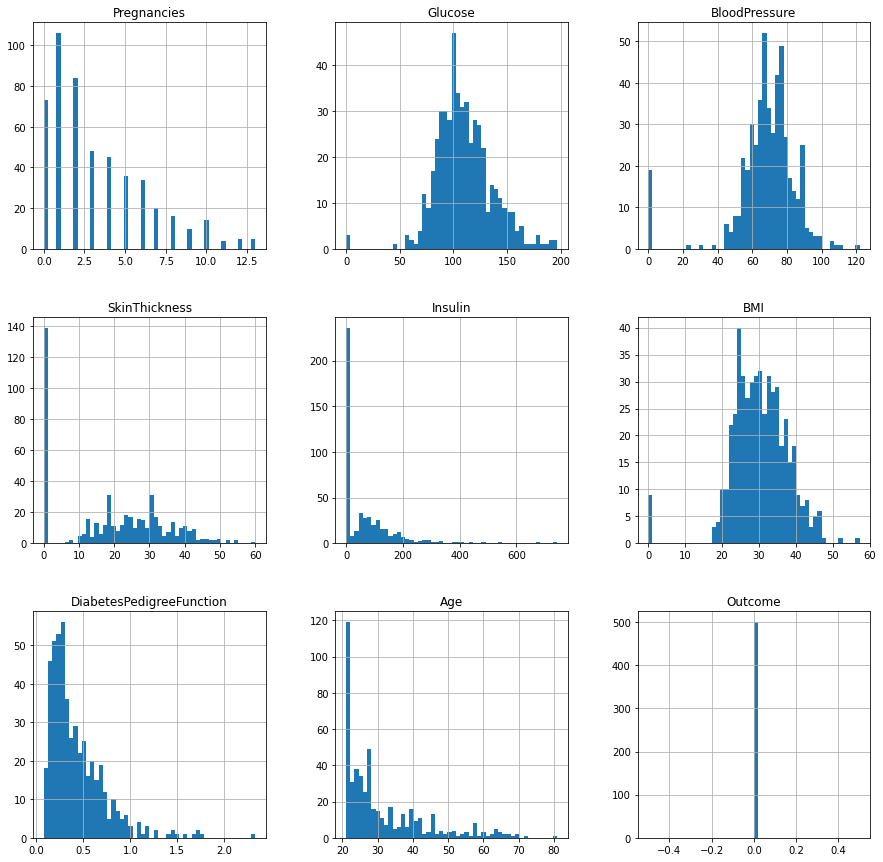

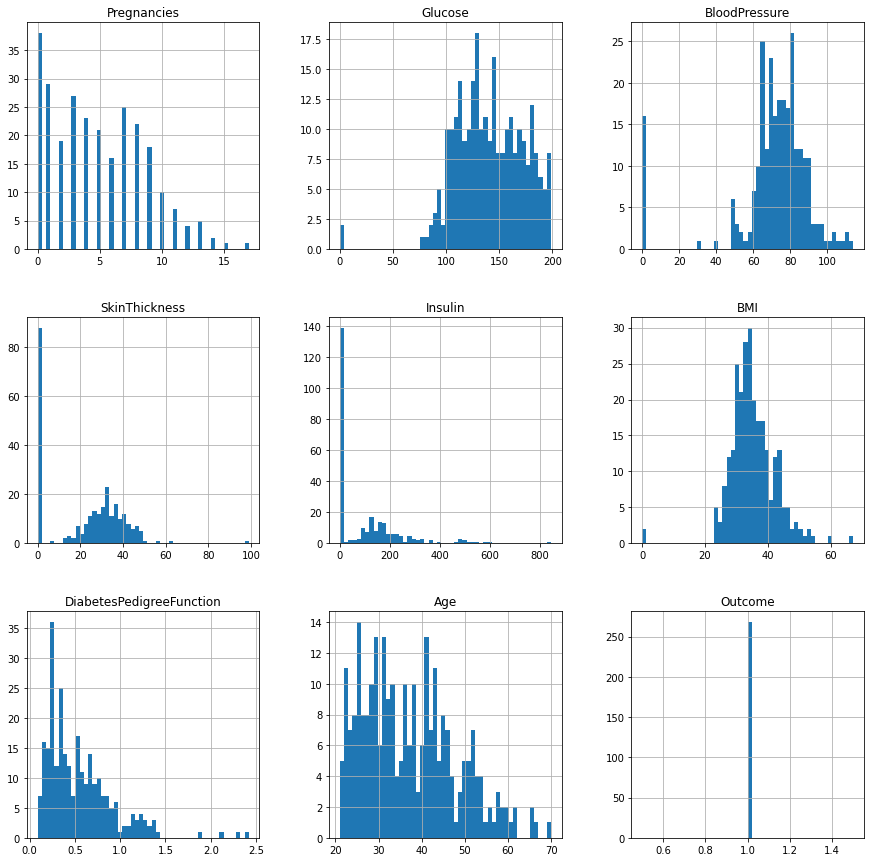

In [ ]:
#display histogram using the groupby function to show count of each attribute for diabetic and non-diabetic patients
#documentation of code: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.hist.html
df.groupby('Outcome').hist(bins=50, figsize=(15,15))

* From the first glace it is clear that there are a lot of zero values for insulin, skin thickness, BMI, glucose and blood pressure. This is very unusual and it indicates that we would need to take of them in the data preparation section.
* Glucose has a normal distribution for non diabetic patients while the graph becomes skewed to the left when accounting for diabetic patients.
* Apart from the zero values there are other outliers. For example, insulin of over 800, diastolic blood pressure of 20, to name a few.

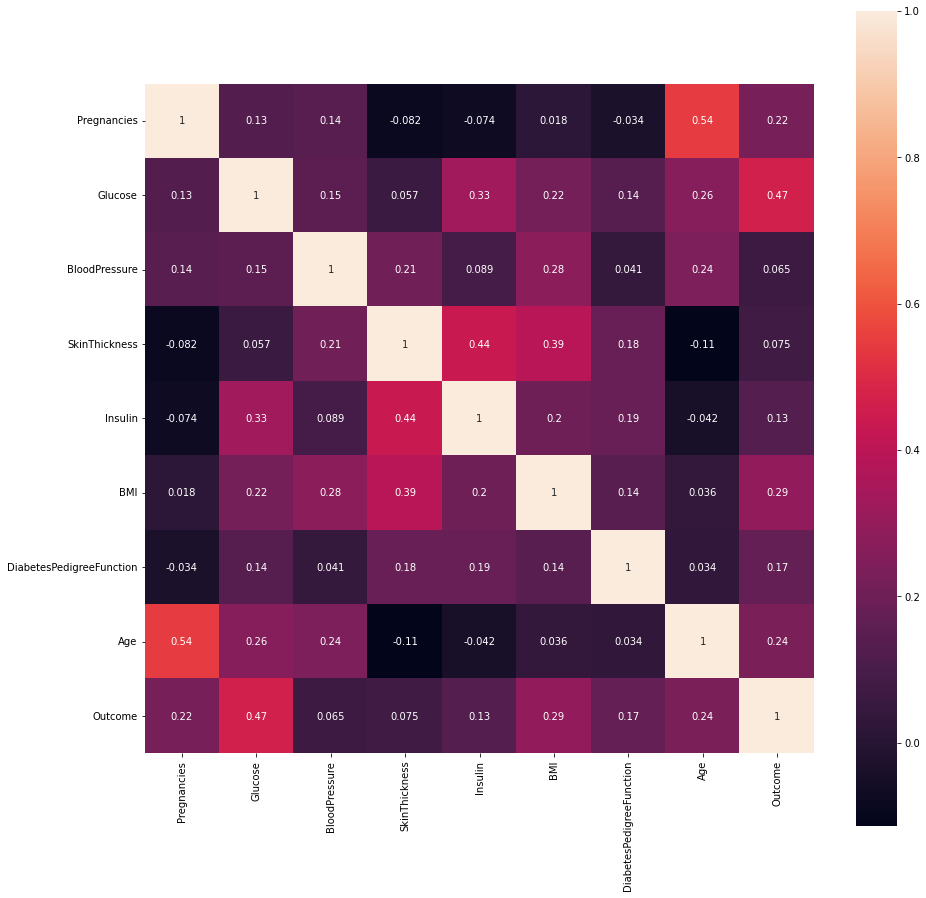

In [ ]:
#correlation heatmap
corr = df.corr()
ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

Findings based on our raw data:
* Diabetes is positively correated with all the attribues, especially with glucose levels, number of pregnancies, age and BMI  of the patient.
* Glucose and Insulin are also strongly correlated along with BMI and skin thickness, glucose and age, blood pressure and age.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


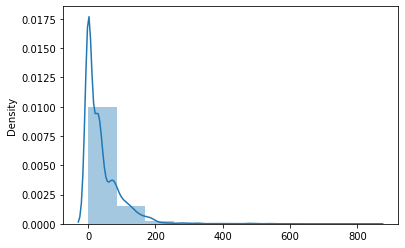

In [ ]:
sns.distplot(df, bins = 10)

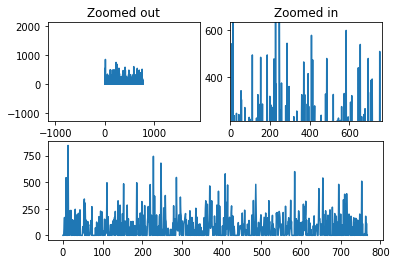

In [3]:
ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(df['Insulin'])

ax2 = plt.subplot(221)
ax2.margins(1.5, 1.5)           # Values >0.0 zoom out
ax2.plot(df['Insulin'])
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(df['Insulin'])
ax3.set_title('Zoomed in')

plt.show()

In [41]:
pd.crosstab(df.Outcome,df.Pregnancies)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


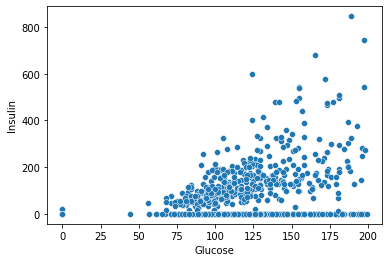

In [51]:
# scatterplot of Glucose vs Insulin
sns.scatterplot(x = 'Glucose', y = 'Insulin', data = df)

#**Data Preparation**

##**Missing values**

In [56]:
#since we noticed lots of 0s for some attributes that should not have them, we would replace them with Nan
df['Glucose'] = df['Glucose'].replace(0,np.NaN)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.NaN)
df['SkinThickness']  = df['SkinThickness'].replace(0,np.NaN)
df['Insulin'] = df['Insulin'].replace(0,np.NaN)
df['BMI'] = df['BMI'].replace(0,np.NaN)

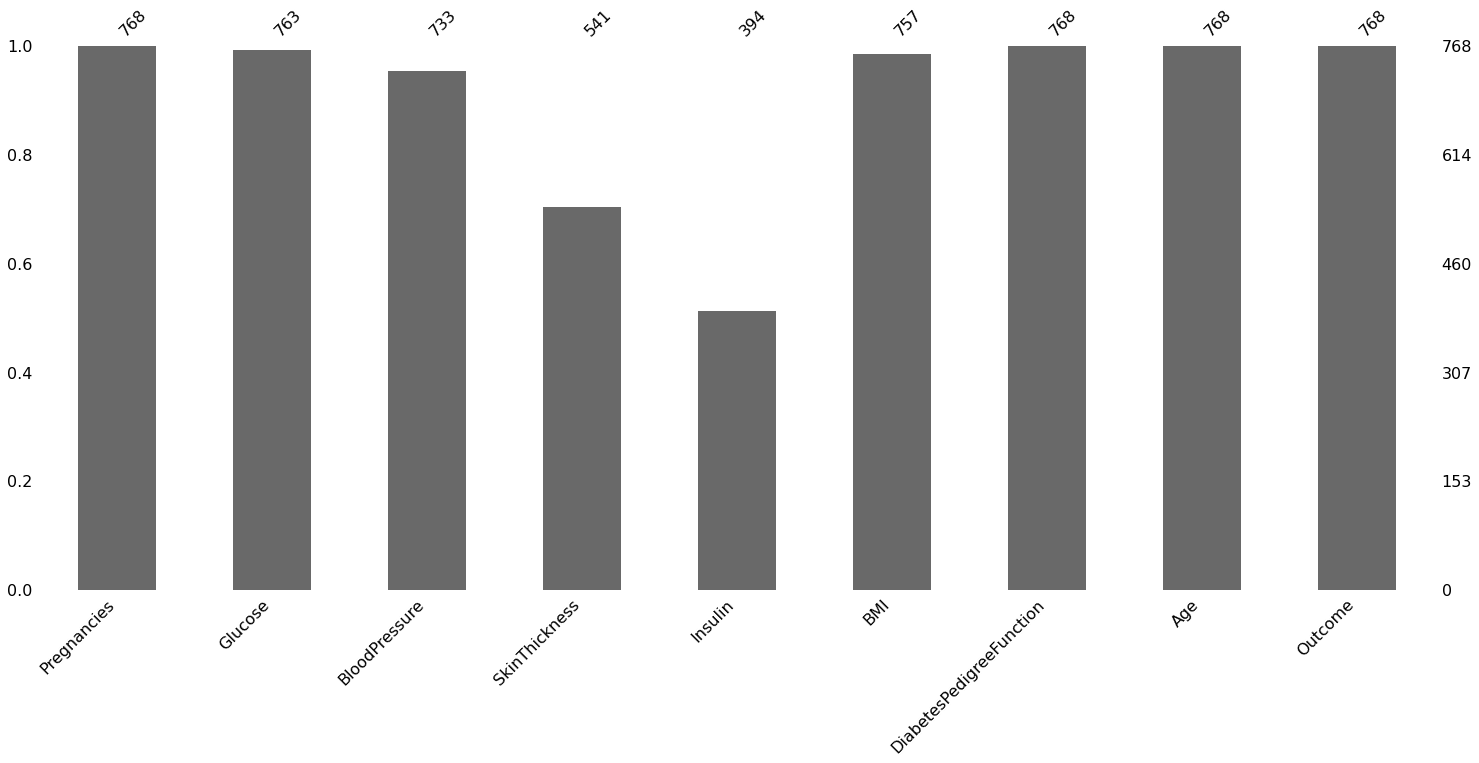

In [57]:
msno.bar(df)

It is clear from the above graph that half of the values of insulin were not accurate. SkinThickness also does not have 30% of its data.

There are two choices that we could make to fix this problem:
*  Fill in the values using some data fillings methods like mean/median/mode or impute the data.
* Drop the two columns as they are highly correlated with Glucose and BMI.

For now we would just Simple imputer to fill in the missing values using the most frequent strategy.  

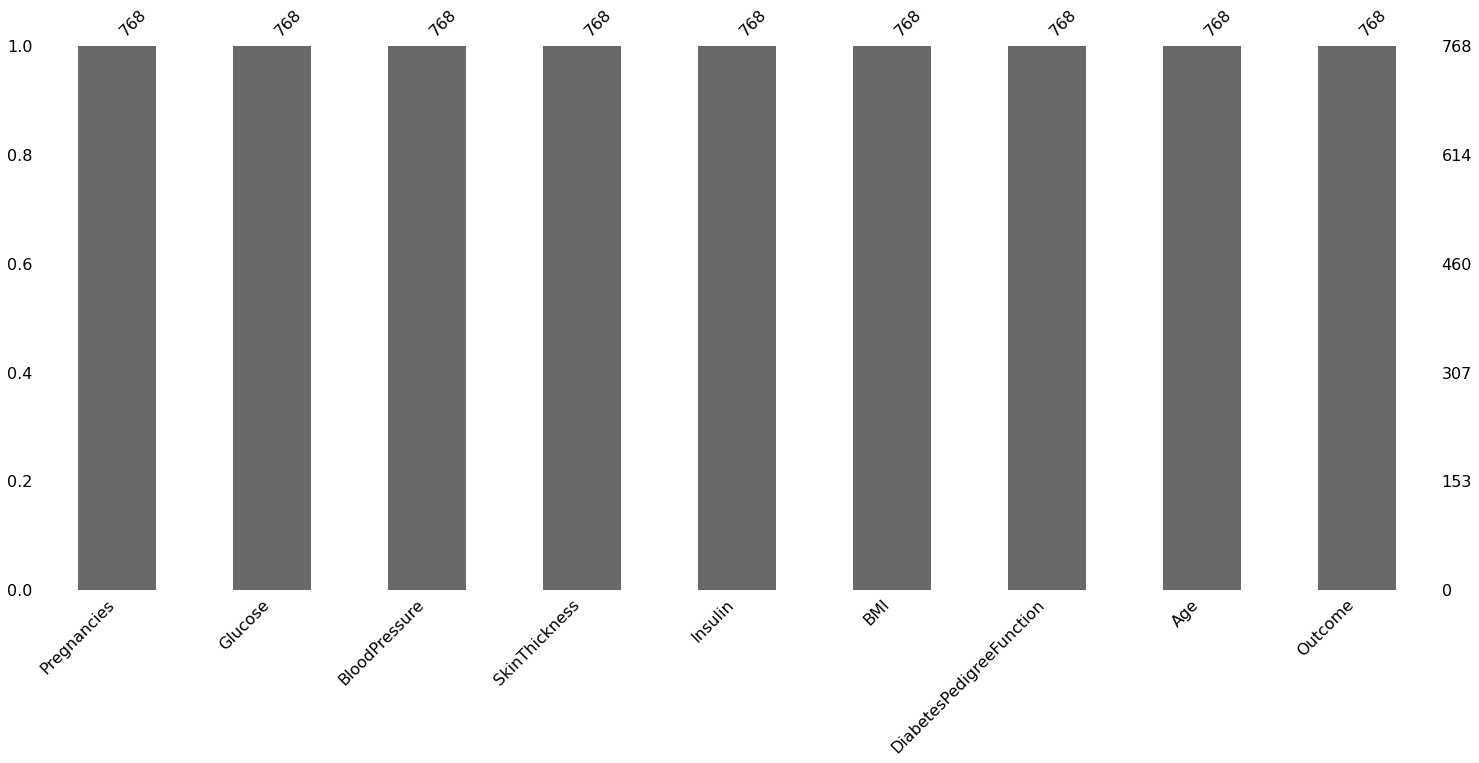

In [58]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df['Insulin'].values.reshape(-1,1))
df['Insulin'] = imp.transform(df['Insulin'].values.reshape(-1,1))
imp.fit(df['SkinThickness'].values.reshape(-1,1))
df['SkinThickness'] = imp.transform(df['SkinThickness'].values.reshape(-1,1))
imp.fit(df['BMI'].values.reshape(-1,1))
df['BMI'] = imp.transform(df['BMI'].values.reshape(-1,1))
imp.fit(df['BloodPressure'].values.reshape(-1,1))
df['BloodPressure'] = imp.transform(df['BloodPressure'].values.reshape(-1,1))
imp.fit(df['Glucose'].values.reshape(-1,1))
df['Glucose'] = imp.transform(df['Glucose'].values.reshape(-1,1))
msno.bar(df)

#**Logistic Regression Model**

In [75]:

y, X = dmatrices('Outcome ~ Pregnancies + Glucose + BloodPressure + Insulin + SkinThickness + BMI + DiabetesPedigreeFunction + Age', df, return_type="dataframe")
y = np.ravel(y)

#ignore warnings
np.warnings.filterwarnings('ignore')

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.7760416666666666

In [70]:
y.mean()

0.3489583333333333

* There is a 65.11% likelihood that we will get the accurate reading if we were to predict that a patient does not have diabetes every single time. 
* Our logistic regression model has a 77.6% accuracy rate which is not too bad compared to the overly simplistic approach stated earlier. 

In [126]:
#classifaction vector
class_vector = model.predict(X).reshape(-1,1)

In [71]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-3.809954113248583]
1,Pregnancies,[0.121910436815967]
2,Glucose,[0.03459986709534666]
3,BloodPressure,[-0.017580031280480177]
4,Insulin,[-0.001293846130712464]
5,SkinThickness,[0.0041990535427884]
6,BMI,[0.07939656901595794]
7,DiabetesPedigreeFunction,[1.0956102400191172]
8,Age,[0.01136322075752326]


We see that past family history (diabetes Pedigree Function) has the highest coefficient.

#**Model Testing**

In [135]:
pd.crosstab(y, x)

col_0,0.0,1.0
row_0,,
0.0,446,54
1.0,118,150


True Positive = 150

False Positive = 54

True Negative = 446

False Negative = 118

In [137]:
#own code for evaluation metrics

true_positive = 0
false_positive = 0
false_negative = 0
true_negative = 0
x = model.predict(X) 
index = 0
for i in y:
  if i == 1 and x[index] == 1:
    true_positive+=1
  if i == 0 and x[index] == 1:
    false_positive += 1
  if i == 1 and x[index] == 0:
    false_negative += 1
  if i == 0 and x[index] == 0:
    true_negative += 1
  index+=1
#precision = TP/(TP + FP)
precision = true_positive/(false_positive + true_positive)
print("Precision ",precision)
#recall = TP/(Tp + FN)
recall = true_positive/(true_positive + false_negative)
print("Recall ", recall)
#specificity = TN/(TN + FP)
specificity = true_negative/(true_negative + false_positive)
print("Specificity " , specificity)
#f1 score = 2 * precision * recall/(precision + recall)
f1_score = 2 * precision * recall/(precision + recall)
print("F1 score " , f1_score)
false_negative


Precision  0.7352941176470589
Recall  0.5597014925373134
Specificity  0.892
F1 score  0.635593220338983


118

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       500
         1.0       0.74      0.56      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



An important metric for calculating the probability of diabetes is the Recall metric. It measures what proportion of patients that have diabetes have been accurately predicted to have it. As the measure comes up as only 56%, it indicates that 56% of the time we accurately diagnose patients that have diabetes. This is alarmingly low and needs to be fixed using some other model or by using more feature selection methods to make a more suitable model.

#**Logististic Regression #2**

##**Feature Selection**

Let's drop skin thickness and Insulin as they were highly correlated features with BMI and Glucose to reduce dimensionality and possible errors that might have occurred when we filled their missing values.

In [163]:
#create copy of dataframe
df_1 = df.copy()

In [164]:
df_1 = df_1.drop('SkinThickness',axis=1)
df_1 = df_1.drop('Insulin', axis=1)

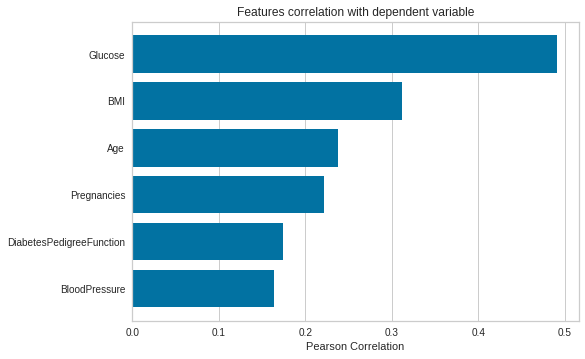

In [367]:
from yellowbrick.target import FeatureCorrelation

y_1 = df_1['Outcome'].to_numpy()

features = df_1.drop('Outcome', axis=1).copy()
feature_names = list(features.columns)
visualizer = FeatureCorrelation(lables=feature_names,method='pearson',sort=True)
visualizer.fit(features,y_1)
visualizer.poof()

The five features that gives the most information about diabetes are glucose, BMI, age, pregancies and diabetes pedigree function.

In [169]:
X_1 = df[['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction']]
y_1 = df['Outcome'].to_numpy()

##**Model**

In [210]:
model_1 = LogisticRegression()
model_1 = model.fit(X_1,y_1)

In [173]:
model_1.score(X_1,y_1)

0.7760416666666666

In [174]:
print(classification_report(y_1, model.predict(X_1)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.57      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



We were able to improve recall by only 1 point but saw a reduction in precision of the same amount.

In summary, feature selection did not improve our results with logistic regression. We will need to now try out other approaches for better recall and accuracy.

#**SMOTE**

In [182]:
y.value_counts()

Outcome
0          500
1          268
dtype: int64

For the majority class there are 500 values while only 268 for the minority class. 

This shows that the data is imbalanced and we would need to implement SMOTE to make both classes equal to other. 

In [264]:

#create training and testing splits for smote
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_smote = X_train
y_train_smote = y_train['Outcome']
X_train_smote.shape, y_train_smote.shape

((537, 8), (537,))

In [265]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train_smote, y_train_smote.ravel())

X_train_res.shape, y_train_res.shape

((686, 8), (686,))

In [266]:
len(y_train_res[y_train_res==0]),len(y_train_res[y_train_res==1])

(343, 343)

In [267]:
model_os = LogisticRegression()
model_os = model.fit(X_train_res, y_train_res)

In [268]:
model_os.score(X_train_res, y_train_res)

0.7405247813411079

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression().fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_test)

In [270]:
model_res = LogisticRegression().fit(X_train_res, y_train_res)
y_pred_smote = model.predict(X_train_res)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       157
           1       0.59      0.68      0.63        74

    accuracy                           0.74       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.76      0.74      0.75       231



Even though our accuracy does not change, we gained substaintial ground on recall, improving our score from 57% to 68%. Overall we would say that SMOTE-ing the dataset and making it balanced helped us be more accurate on identifying patients with diabetes.

#**ROC and Confusion Matrix**

In [369]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[122  35]
 [ 24  50]]


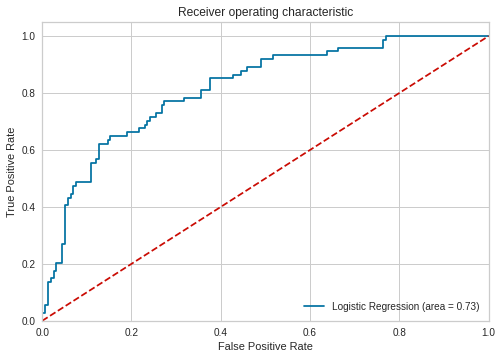

In [368]:
#referred form M_Fried_M8_assn notebook
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#**Chi-Square and P-values**

In [278]:
#create a dataframe of the correlation matrix threshold of .1
corr_columns = ['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']
corr_df = df.filter(corr_columns, axis = 1)
corr_df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,105.0,33.6,0.627,50
1,1,85.0,105.0,26.6,0.351,31
2,8,183.0,105.0,23.3,0.672,32
3,1,89.0,94.0,28.1,0.167,21
4,0,137.0,168.0,43.1,2.288,33


In [300]:
from scipy import stats

#perform the chi-square test
df_i = df.drop('Outcome', axis=1).copy()
target=df['Outcome'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,8):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df_i.iloc[:,i]),lambda_="log-likelihood")[0:2],i])
#display chi square values in sorted order
chi_sq.sort(reverse=True)
chi_sq

[[(693.0152479772073, 2.829056005134982e-07), 6],
 [(364.8259757835176, 1.2592918370607042e-06), 5],
 [(317.2011803309489, 6.84474622622687e-17), 1],
 [(290.6195627507989, 8.829015988421447e-07), 4],
 [(150.0560221531524, 1.0888852109851521e-11), 7],
 [(86.48491540499187, 0.000763168053466384), 3],
 [(65.82383811497749, 5.3125825158695635e-08), 0],
 [(62.89046347632809, 0.040076791848731884), 2]]

According to the chi square test, the most prominent features that affect Outcome are Diabetes pedigree function, BMI, glucose, insulin, age, in that order.

In [307]:
from scipy import stats

corr = stats.pearsonr(df.Outcome, df.BMI)
corr

(0.31224902667327137, 7.879147621565946e-19)

In [318]:
#source code: https://www.youtube.com/watch?v=o7VCeCxHCTI
from scipy import stats

corr_df = pd.DataFrame(columns=['correlation','p-value'])
for col in df:
  if col != 'Outcome':
    r, p = stats.pearsonr(df.Outcome, df[col])
    corr_df.loc[col] = [round(r,3), p]
corr_df

,correlation,p-value
Pregnancies,0.222,5.065127e-10
Glucose,0.492,5.865832e-48
BloodPressure,0.164,4.996776e-06
SkinThickness,0.221,6.329167e-10
Insulin,0.194,6.135107e-08
BMI,0.312,7.879148e-19
DiabetesPedigreeFunction,0.174,1.254607e-06
Age,0.238,2.209975e-11


All the p-values of the attributes are extremely small(<.005) indicating that the null hypothesis is rejected.

#**SVM model**#

In [359]:
#Normalize data
X_train_res_n = (X_train_res - X_train_res.min())/(X_train_res.max() - X_train_res.min())

In [360]:
#source: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python


from sklearn import svm

clf_n = svm.SVC(kernel='linear')

clf_n.fit(X_train_res_n, y_train_res)

y_pred_svm_1 = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_svm_1))

Accuracy:  0.7532467532467533


In [361]:
print(classification_report(y_test, y_pred_svm_1))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       157
           1       0.61      0.62      0.62        74

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



Using the SMOTE data we get a recall score of 62% and accuracy of 75%. Unfortunately the results are worse than what we acheived using **Logistic Regression**:
            
                precision    recall  f1-score   support

           0       0.84      0.78      0.81       157
           1       0.59      0.68      0.63        74

#**Summary**

This project was done to predict the likelihood that a patient has got diabetes using two models, Logistic Regression and Support Vector Machine. 

Our approach consisted of the following steps:  
* Firstly, we sourced the Pima Indian Dataset that had 8 attributes from Github and did some basic exploration of the data. 
* Then we cleaned the raw data of its missing values.
* For starters we created a logistic regression model on all the attributes and performed evaluation metrics on the model.
* Next, we created another logistic regression model but this time, we used our feature selection skills to reduce the dimensionality of the data and removed highly correlated independent variables.
* However, feature selection did not improve any of the main performance metrics like recall which is the measure given by TP/(TP + FN). TP = True Positive, FN = False Negative.
* After that we showed that the data is imbalanced and implemented the SMOTE algorithm to make the data balanced.
* Then we ran the same performance metrics including the ROC curve and confusion matrix to display the change in the recall score and accuracy.
* Finally we used feature engineering techniques like chi-square and p values tests and created a model using the Support Vector Machine and compared its results to the logistic regression model.